<a href="https://colab.research.google.com/github/IJ-Jany/diplab04/blob/main/2125051046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Israt jaman jany
2125051046

In [13]:
from google.colab import drive
drive.mount('/content/drive') # Mounting to /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
from google.colab import files
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

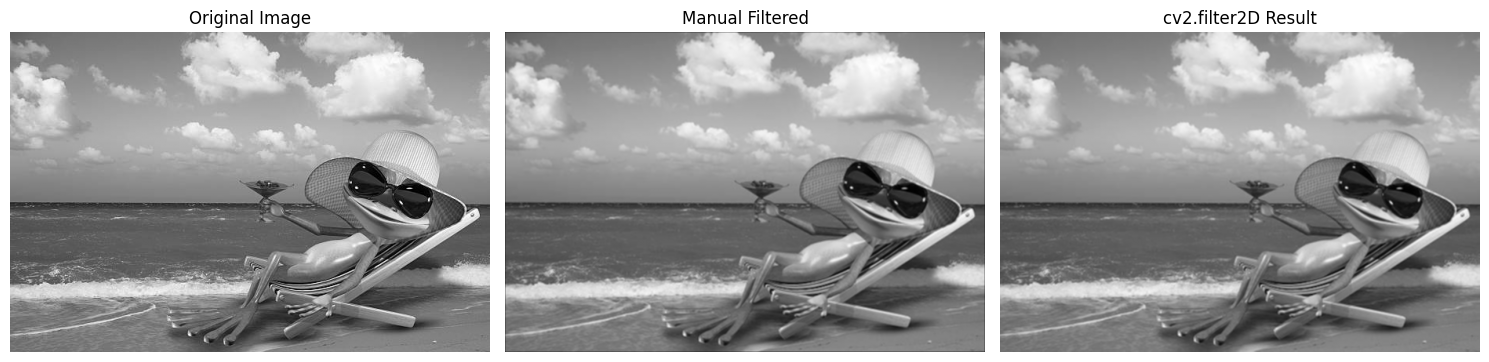

In [15]:
# Load grayscale image from local file
img = Image.open('/content/drive/MyDrive/photosdp/frogphoto.jpg').convert('L')
gray = np.array(img)

# Define and normalize the custom filter (kernel)
kernel = np.array([
    [1, 1, 1],
    [1, 2, 1],
    [1, 1, 1]
], dtype=np.float32)

# Normalize the kernel
kernel = kernel / kernel.sum()

# Function for manual convolution (unchanged)
def apply_convolution(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad = kh // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    output = np.zeros_like(image, dtype=np.float32)

    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)

    return output.astype(np.uint8)

# Apply the filter manually (unchanged)
manually_filtered = apply_convolution(gray, kernel)

# Apply the filter using OpenCV's filter2D (unchanged)
opencv_filtered = cv2.filter2D(gray, -1, kernel)

# Plot all 3 images (unchanged)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(manually_filtered, cmap='gray')
plt.title('Manual Filtered')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opencv_filtered, cmap='gray')
plt.title('cv2.filter2D Result')
plt.axis('off')

plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


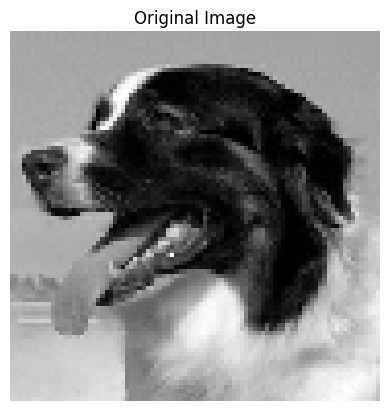

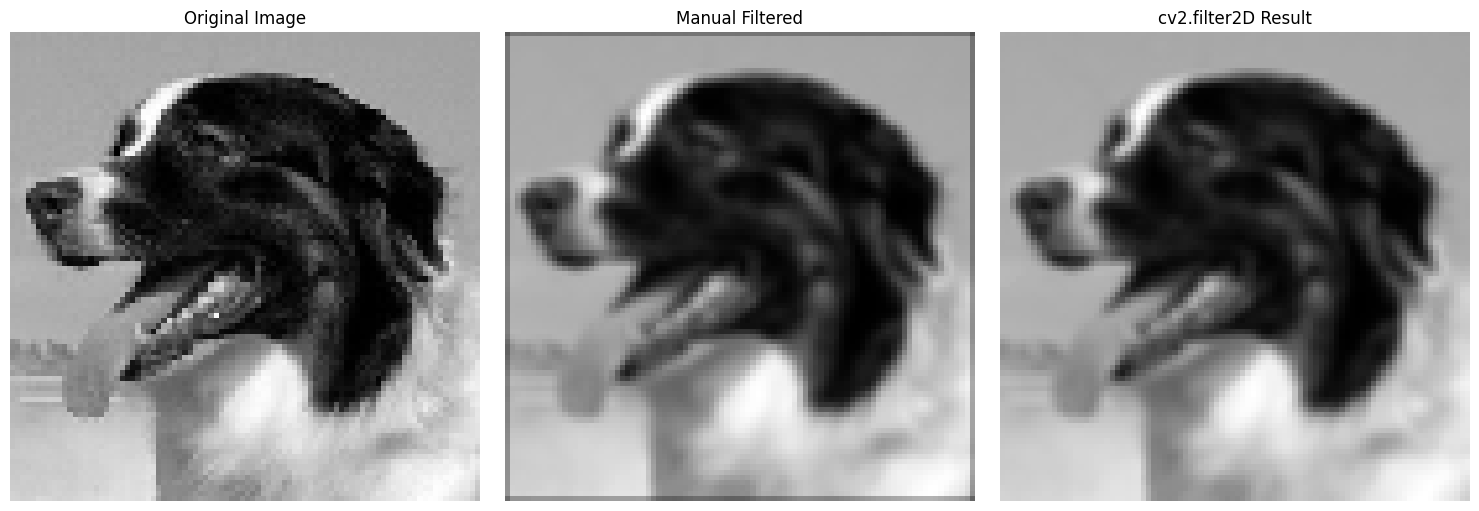

In [18]:
# Mount Google Drive (if needed for saving or loading other resources)
from google.colab import drive
drive.mount('/content/drive')

from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

# Step 1: Read a black and white image from URL
url = 'https://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png'  # Example grayscale image
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale
image = np.array(img)

# Show the original grayscale image
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Step 2: Define and normalize the custom weighted filter
kernel = np.array([
    [1, 1, 1],
    [1, 2, 1],
    [1, 1, 1]
], dtype=np.float32)

kernel = kernel / kernel.sum()  # Normalize so the sum = 1

# Step 3: Define function to apply convolution manually
def apply_convolution(gray_image, kernel):
    h, w = gray_image.shape
    kh, kw = kernel.shape
    pad = kh // 2

    padded_image = np.pad(gray_image, pad, mode='constant', constant_values=0)
    output = np.zeros_like(gray_image)

    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)

    return output

# Step 4: Apply manual convolution
manual_filtered = apply_convolution(image, kernel)

# Step 5: Apply filter using OpenCV's filter2D
opencv_filtered = cv2.filter2D(image, -1, kernel)

# Step 6: Show all three images in subplots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(manual_filtered, cmap='gray')
plt.title('Manual Filtered')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opencv_filtered, cmap='gray')
plt.title('cv2.filter2D Result')
plt.axis('off')

plt.tight_layout()
plt.show()